In [23]:
import csv
import pickle
import pandas as pd
import numpy as np
import re
import math
import random
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.regularizers import l1,l2
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from keras.callbacks import EarlyStopping
import os
#from utilities import *
#from view import *
import statsmodels.api as sm
#import datetime as dt
import time
from dateutil.relativedelta import *

# comment these if running python instead of ipython
#%load_ext autoreload
%matplotlib inline
#%autoreload 1

In [24]:
models = {}
models['linear']=[]
models['NN']=[]
models['PLS_NN']={}

models['PLS_NN'][50]=[]
models['PLS_NN'][80]=[]
models['PLS_NN'][95]=[]

xs = {}
ys = {}

xs['train_PLS']=[]
xs['test_PLS']=[]
ys['train_PLS']=[]
ys['test_PLS']=[]

xs['train_linear'] = []
xs['test_linear']=[]
ys['train_linear']=[]
ys['test_linear']=[]

xs['train']=[]
xs['test']=[]
ys['train']=[]
ys['test']=[]

In [25]:
NN_models_folder = '../models/NN'
PLS_models_folder = '../models/PLS_NN'
vars_explained = [50, 80, 95]

In [26]:
def load_PLS(models, vars_explained = os.listdir(PLS_models_folder)):
    for var in vars_explained:
        models_folder = '%s/%s' % (PLS_models_folder, var)
        models_saved = os.listdir(models_folder)
        for training_periods, model_name in enumerate(models_saved):
            model_loc = '%s/%s/%s' % (PLS_models_folder, var, model_name)
            print(model_loc)
            model = load_model(model_loc)
            models['PLS_NN'][var].append(model)
    return models, training_periods+1

def load_NN(models):
    models_saved = os.listdir(NN_models_folder)
    for model_name in models_saved:
        model_loc = '%s/%s' % (NN_models_folder, model_name)
        print(model_loc)
        model = load_model(model_loc)
        models['NN'].append(model)
    return models

def load_all_models(models, vars_explained):
    models, training_periods = load_PLS(models, vars_explained)
    models = load_NN(models)
    return models, training_periods

In [27]:
models, training_periods = load_PLS(models, vars_explained)

../models/PLS_NN/50/model_1989-12-01
../models/PLS_NN/50/model_1990-01-01
../models/PLS_NN/50/model_1990-02-01
../models/PLS_NN/50/model_1990-03-01
../models/PLS_NN/50/model_1990-04-01
../models/PLS_NN/50/model_1990-05-01
../models/PLS_NN/50/model_1990-06-01
../models/PLS_NN/50/model_1990-07-01
../models/PLS_NN/50/model_1990-08-01
../models/PLS_NN/50/model_1990-09-01
../models/PLS_NN/50/model_1990-10-01
../models/PLS_NN/50/model_1990-11-01
../models/PLS_NN/50/model_1990-12-01
../models/PLS_NN/50/model_1991-01-01
../models/PLS_NN/50/model_1991-02-01
../models/PLS_NN/50/model_1991-03-01
../models/PLS_NN/50/model_1991-04-01
../models/PLS_NN/50/model_1991-05-01
../models/PLS_NN/50/model_1991-06-01
../models/PLS_NN/50/model_1991-07-01
../models/PLS_NN/50/model_1991-08-01
../models/PLS_NN/50/model_1991-09-01
../models/PLS_NN/50/model_1991-10-01
../models/PLS_NN/50/model_1991-11-01
../models/PLS_NN/50/model_1991-12-01
../models/PLS_NN/50/model_1992-01-01
../models/PLS_NN/50/model_1992-02-01
.

../models/PLS_NN/50/model_2008-06-01
../models/PLS_NN/50/model_2008-07-01
../models/PLS_NN/50/model_2008-08-01
../models/PLS_NN/50/model_2008-09-01
../models/PLS_NN/50/model_2008-10-01
../models/PLS_NN/50/model_2008-11-01
../models/PLS_NN/50/model_2008-12-01
../models/PLS_NN/50/model_2009-01-01
../models/PLS_NN/50/model_2009-02-01
../models/PLS_NN/50/model_2009-03-01
../models/PLS_NN/50/model_2009-04-01
../models/PLS_NN/50/model_2009-05-01
../models/PLS_NN/50/model_2009-06-01
../models/PLS_NN/50/model_2009-07-01
../models/PLS_NN/50/model_2009-08-01
../models/PLS_NN/50/model_2009-09-01
../models/PLS_NN/50/model_2009-10-01
../models/PLS_NN/50/model_2009-11-01
../models/PLS_NN/50/model_2009-12-01
../models/PLS_NN/50/model_2010-01-01
../models/PLS_NN/50/model_2010-02-01
../models/PLS_NN/50/model_2010-03-01
../models/PLS_NN/50/model_2010-04-01
../models/PLS_NN/50/model_2010-05-01
../models/PLS_NN/50/model_2010-06-01
../models/PLS_NN/50/model_2010-07-01
../models/PLS_NN/50/model_2010-08-01
.

../models/PLS_NN/80/model_1999-04-01
../models/PLS_NN/80/model_1999-05-01
../models/PLS_NN/80/model_1999-06-01
../models/PLS_NN/80/model_1999-07-01
../models/PLS_NN/80/model_1999-08-01
../models/PLS_NN/80/model_1999-09-01
../models/PLS_NN/80/model_1999-10-01
../models/PLS_NN/80/model_1999-11-01
../models/PLS_NN/80/model_1999-12-01
../models/PLS_NN/80/model_2000-01-01
../models/PLS_NN/80/model_2000-02-01
../models/PLS_NN/80/model_2000-03-01
../models/PLS_NN/80/model_2000-04-01
../models/PLS_NN/80/model_2000-05-01
../models/PLS_NN/80/model_2000-06-01
../models/PLS_NN/80/model_2000-07-01
../models/PLS_NN/80/model_2000-08-01
../models/PLS_NN/80/model_2000-09-01
../models/PLS_NN/80/model_2000-10-01
../models/PLS_NN/80/model_2000-11-01
../models/PLS_NN/80/model_2000-12-01
../models/PLS_NN/80/model_2001-01-01
../models/PLS_NN/80/model_2001-02-01
../models/PLS_NN/80/model_2001-03-01
../models/PLS_NN/80/model_2001-04-01
../models/PLS_NN/80/model_2001-05-01
../models/PLS_NN/80/model_2001-06-01
.

../models/PLS_NN/95/model_1990-02-01
../models/PLS_NN/95/model_1990-03-01
../models/PLS_NN/95/model_1990-04-01
../models/PLS_NN/95/model_1990-05-01
../models/PLS_NN/95/model_1990-06-01
../models/PLS_NN/95/model_1990-07-01
../models/PLS_NN/95/model_1990-08-01
../models/PLS_NN/95/model_1990-09-01
../models/PLS_NN/95/model_1990-10-01
../models/PLS_NN/95/model_1990-11-01
../models/PLS_NN/95/model_1990-12-01
../models/PLS_NN/95/model_1991-01-01
../models/PLS_NN/95/model_1991-02-01
../models/PLS_NN/95/model_1991-03-01
../models/PLS_NN/95/model_1991-04-01
../models/PLS_NN/95/model_1991-05-01
../models/PLS_NN/95/model_1991-06-01
../models/PLS_NN/95/model_1991-07-01
../models/PLS_NN/95/model_1991-08-01
../models/PLS_NN/95/model_1991-09-01
../models/PLS_NN/95/model_1991-10-01
../models/PLS_NN/95/model_1991-11-01
../models/PLS_NN/95/model_1991-12-01
../models/PLS_NN/95/model_1992-01-01
../models/PLS_NN/95/model_1992-02-01
../models/PLS_NN/95/model_1992-03-01
../models/PLS_NN/95/model_1992-04-01
.

../models/PLS_NN/95/model_2008-08-01
../models/PLS_NN/95/model_2008-09-01
../models/PLS_NN/95/model_2008-10-01
../models/PLS_NN/95/model_2008-11-01
../models/PLS_NN/95/model_2008-12-01
../models/PLS_NN/95/model_2009-01-01
../models/PLS_NN/95/model_2009-02-01
../models/PLS_NN/95/model_2009-03-01
../models/PLS_NN/95/model_2009-04-01
../models/PLS_NN/95/model_2009-05-01
../models/PLS_NN/95/model_2009-06-01
../models/PLS_NN/95/model_2009-07-01
../models/PLS_NN/95/model_2009-08-01
../models/PLS_NN/95/model_2009-09-01
../models/PLS_NN/95/model_2009-10-01
../models/PLS_NN/95/model_2009-11-01
../models/PLS_NN/95/model_2009-12-01
../models/PLS_NN/95/model_2010-01-01
../models/PLS_NN/95/model_2010-02-01
../models/PLS_NN/95/model_2010-03-01
../models/PLS_NN/95/model_2010-04-01
../models/PLS_NN/95/model_2010-05-01
../models/PLS_NN/95/model_2010-06-01
../models/PLS_NN/95/model_2010-07-01
../models/PLS_NN/95/model_2010-08-01
../models/PLS_NN/95/model_2010-09-01
../models/PLS_NN/95/model_2010-10-01
.

In [29]:
models = load_NN(models)

../models/NN/model_1989-12-01
../models/NN/model_1990-01-01
../models/NN/model_1990-02-01
../models/NN/model_1990-03-01
../models/NN/model_1990-04-01
../models/NN/model_1990-05-01
../models/NN/model_1990-06-01
../models/NN/model_1990-07-01
../models/NN/model_1990-08-01
../models/NN/model_1990-09-01
../models/NN/model_1990-10-01
../models/NN/model_1990-11-01
../models/NN/model_1990-12-01
../models/NN/model_1991-01-01
../models/NN/model_1991-02-01
../models/NN/model_1991-03-01
../models/NN/model_1991-04-01
../models/NN/model_1991-05-01
../models/NN/model_1991-06-01
../models/NN/model_1991-07-01
../models/NN/model_1991-08-01
../models/NN/model_1991-09-01
../models/NN/model_1991-10-01
../models/NN/model_1991-11-01
../models/NN/model_1991-12-01
../models/NN/model_1992-01-01
../models/NN/model_1992-02-01
../models/NN/model_1992-03-01
../models/NN/model_1992-04-01
../models/NN/model_1992-05-01
../models/NN/model_1992-06-01
../models/NN/model_1992-07-01
../models/NN/model_1992-08-01
../models/

../models/NN/model_2012-10-01
../models/NN/model_2012-11-01
../models/NN/model_2012-12-01
../models/NN/model_2013-01-01
../models/NN/model_2013-02-01
../models/NN/model_2013-03-01
../models/NN/model_2013-04-01
../models/NN/model_2013-05-01
../models/NN/model_2013-06-01
../models/NN/model_2013-07-01
../models/NN/model_2013-08-01
../models/NN/model_2013-09-01
../models/NN/model_2013-10-01
../models/NN/model_2013-11-01
../models/NN/model_2013-12-01
../models/NN/model_2014-01-01
../models/NN/model_2014-02-01
../models/NN/model_2014-03-01
../models/NN/model_2014-04-01
../models/NN/model_2014-05-01
../models/NN/model_2014-06-01
../models/NN/model_2014-07-01
../models/NN/model_2014-08-01
../models/NN/model_2014-09-01
../models/NN/model_2014-10-01
../models/NN/model_2014-11-01
../models/NN/model_2014-12-01
../models/NN/model_2015-01-01
../models/NN/model_2015-02-01
../models/NN/model_2015-03-01
../models/NN/model_2015-04-01
../models/NN/model_2015-05-01
../models/NN/model_2015-06-01
../models/

## Sensitivities

In [48]:
def sensitivities_clear(model, scores, loadings, L, activation='tanh'):
        
    X_factors = scores @ np.transpose(loadings)
    
    X = scores

    print("scores = X", scores.shape) #(944, 14)
    print("loadings = P", loadings.shape) #(49, 14)
    print("X_factors", X_factors.shape, "\n") #(944, 49)
    
    W = model.get_weights()        

    print(len(W))     #6
    print(W[0].shape) #(14, 100)
    print(W[1].shape) #(100,)
    print(W[2].shape) #(100, 100)
    print(W[3].shape) #(100,)
    print(W[4].shape) #(100, 1)
    print(W[5].shape) #(1,)
    
    M = np.shape(X)[0] # 944
    #print(M)
    p = np.shape(X)[1] # Originally 14 (np.shape(X)[1]) but we want 49 betas, one for each factor
    #print(p)
    size_betas = np.shape(X_factors)[1]
    
    beta = np.array([0]*M*(p+1), dtype='float32').reshape(M,p+1)
    beta_interact = np.array([0]*M*p*p, dtype='float32').reshape(M,p,p)
    B_0 = W[1]

    
    for i in range (0,L):
        B_0 = (np.dot(np.transpose(W[2*(i+1)]),np.tanh(B_0))+W[2*(i+1)+1])

    beta[:,0]= B_0 # intercept \beta_0= F_{W,b}(0)
    
    for m in range(M): #First iter: M=944
    
        #scores[i,].shape (14,)  -> 14 Principal Components of PLS
        #W are the weights. W[0].shape is (14, 100)
        
        I1 = np.transpose(W[0]) @ scores[m,] + W[1] 
        #I1.shape (100,)
        
        Z= np.tanh(I1)
        #Z.shape (100,)
        
        D = np.diag(1-Z**2) # -> partial_x*sigma(x) . Need to multiply by P_{ij} 
        #D.shape (100, 100)
        
        for i in range(p):  #First iter p=14
            
            J = D @ W[0][i] # Here I want loadings[i,j] = P_{ij}
            #J.shape (100,)
            
            I2 = np.transpose(W[2]) @ Z + W[3]
            #I2.shape (100,)
            
            Z2 = np.tanh(I2)
            #Z2.shape (100,)
            
            D2 = np.diag(1-Z2**2)
            #D2.shape (100, 100)
            
            J2 = (D2 @ np.transpose(W[2])) @ J
            #J2.shape (100,)
                
            beta_iter = np.transpose(W[4]) @ J2
            #beta_iter.shape (1,)
        
            beta[m,j+1] = beta_iter 
            
        #(944 x 14) 
            
        """    for j in range(49):
        
                print(beta_iter)
                * loadings[j,i]
        """    
        *P    
        break
            
            
    """
            #interaction term
            if activation=='tanh': # relu activation is problematic for estimating interaction terms.
                if L == 1:     # L: number of hidden layers
                    for k in range(p):
                        beta_interact[i,j,k]=np.dot(np.transpose(W[2]),np.dot(np.diag(W[0][j]), np.dot(D1_diff,W[0][k]))) # Hessian matrix  
                elif L == 2:
                    for k in range(p):
                        Z2 = np.tanh(I2)
                        D2 = np.diag(1-Z2**2) 
                        D2_diff = np.diag(-2*Z2*(1-Z2**2))
                        part1 = np.dot(D2_diff, np.dot(np.transpose(W[2]), np.dot(D1, np.dot(np.diag(W[0][k]), D1))))
                        part2 = np.dot(D1_diff, np.dot(np.diag(W[0][k]),D2))
                        beta_interact[i,j,k]=np.dot(np.transpose(W[4]),np.dot(np.transpose(W[2]),np.dot((part1+part2), W[0][j])))
            else:
                beta_interact = 'N/A'
    """
    return(beta, beta_interact)

SyntaxError: can't use starred expression here (<ipython-input-48-4d2eb9684669>, line 83)

In [248]:
def sensitivities(model, scores, L, activation='tanh'):
    X = scores
    
    W = model.get_weights()
    M = np.shape(X)[0] # e.g 944
    p = np.shape(X)[1] # e.g 14
    
    size_betas = np.shape(X)[1]
    
    beta = np.array([0]*M*(size_betas), dtype='float32').reshape(M,size_betas)
    beta_interact = np.array([0]*M*size_betas*size_betas, dtype='float32').reshape(M,size_betas,size_betas)
    B_0 = W[1]
    
    for i in range (0,L):
        if activation=='tanh':
            B_0 = (np.dot(np.transpose(W[2*(i+1)]),np.tanh(B_0))+W[2*(i+1)+1])
        elif activation=='relu':
            B_0 = (np.dot(np.transpose(W[2*(i+1)]),np.maximum(B_0,0))+W[2*(i+1)+1])
            
    for i in range(M):
        I1 = np.dot(np.transpose(W[0]),np.transpose(X[i,])) + W[1]
        if activation=='tanh':
            Z= np.tanh(I1)
            D = np.diag(1-Z**2)
            D1_diff = np.diag(-2*Z*(1-Z**2))
            I2 = np.dot(np.transpose(W[2]),Z) + W[3]
            D1 = D
        elif activation=='relu':
            Z=np.maximum(I1,0)
            D = np.diag(np.sign(Z))

        for j in range(p):
            J = np.dot(D,W[0][j])       
            for a in range (1,L):
                I= np.dot(np.transpose(W[2*a]),Z) + W[2*a+1] 
                if activation=='tanh':  
                    Z = np.tanh(I)
                    D = np.diag(1-Z**2)
                elif activation=='relu':    
                    Z = np.maximum(I,0)
                    D = np.diag(np.sign(Z)) 
                J = np.dot(np.dot(D,np.transpose(W[a*2])),J)
            beta[i,j] = np.dot(np.transpose(W[2*L]),J)

            #interaction term
            if activation=='tanh': # relu activation is problematic for estimating interaction terms.
                if L == 1:     # L: number of hidden layers
                    for k in range(p):
                        beta_interact[i,j,k]=np.dot(np.transpose(W[2]),np.dot(np.diag(W[0][j]), np.dot(D1_diff,W[0][k]))) # Hessian matrix  
                elif L == 2:
                    for k in range(p):
                        Z2 = np.tanh(I2)
                        D2 = np.diag(1-Z2**2) 
                        D2_diff = np.diag(-2*Z2*(1-Z2**2))
                        part1 = np.dot(D2_diff, np.dot(np.transpose(W[2]), np.dot(D1, np.dot(np.diag(W[0][k]), D1))))
                        part2 = np.dot(D1_diff, np.dot(np.diag(W[0][k]),D2))
                        beta_interact[i,j,k]=np.dot(np.transpose(W[4]),np.dot(np.transpose(W[2]),np.dot((part1+part2), 
                                                                                                        W[0][j])))
            else:
                beta_interact = 'N/A'
            
    return(beta, beta_interact)

## Datasets Loading

In [50]:
Ps = {}
Ps['train'] = {}
Ps['test'] = {}

Ps['train'][50] = []
Ps['train'][80] = []
Ps['train'][95] = []

Ps['test'][50] = []
Ps['test'][80] = []
Ps['test'][95] = []

In [51]:
betas = {}
betas['NN'] = []
betas['linear'] = []
betas['PLS_NN'] = {}

betas['PLS_NN'][50] = []
betas['PLS_NN'][80] = []
betas['PLS_NN'][95] = []


beta_interacts = {}
beta_interacts['NN'] = []
beta_interacts['linear'] = []
beta_interacts['PLS_NN'] = {}

beta_interacts['PLS_NN'][50] = []
beta_interacts['PLS_NN'][80] = []
beta_interacts['PLS_NN'][95] = []

In [ ]:
for var in vars_explained: 
    print(var)
    x_trains_folder = "%s/%i/x_train" % (PLS_data_folder, var)
    y_trains_folder = "%s/%i/y_train" % (PLS_data_folder, var)
    x_tests_folder = "%s/%i/x_test" % (PLS_data_folder, var)
    y_tests_folder = "%s/%i/y_test" % (PLS_data_folder, var)

    p_train_folder = "%s/%i/train_loadings" % (PLS_data_folder, var)
    p_test_folder = "%s/%i/test_loadings" % (PLS_data_folder, var)

    x_trains_files = os.listdir(x_trains_folder)
    y_trains_files = os.listdir(y_trains_folder)
    x_tests_files = os.listdir(x_tests_folder)
    y_tests_files = os.listdir(y_tests_folder)

    p_train_files = os.listdir(p_train_folder)
    p_test_files = os.listdir(p_test_folder)

    for i in range( 283, training_periods ): 
        print(i)
        x_train_file = "%s/%s" % (x_trains_folder, x_trains_files[i])
        y_train_file = "%s/%s" % (y_trains_folder, y_trains_files[i])
        x_test_file = "%s/%s" % (x_tests_folder, x_tests_files[i])
        y_test_file = "%s/%s" % (y_tests_folder, y_tests_files[i])

        p_train_file = "%s/%s" % (p_train_folder, p_train_files[i])
        p_test_file = "%s/%s" % (p_test_folder, p_test_files[i])

        x_train = pd.read_csv(x_train_file)
        y_train = pd.read_csv(y_train_file)
        x_test = pd.read_csv(x_test_file)
        y_test = pd.read_csv(y_test_file)

        p_train = pd.read_csv(p_train_file)
        p_test = pd.read_csv(p_test_file)

        x_train.drop(columns='Unnamed: 0', inplace=True)
        y_train.drop(columns='Unnamed: 0', inplace=True)
        x_test.drop(columns='Unnamed: 0', inplace=True)
        y_test.drop(columns='Unnamed: 0', inplace=True)

        p_train.drop(columns='Unnamed: 0', inplace=True)
        p_test.drop(columns='Unnamed: 0', inplace=True)

        n_inputs = x_train.shape[1]
        if n_inputs ==0:
            next

        #xs['train_PLS'].append(x_train)
        #ys['train_PLS'].append(y_train)
        #xs['test_PLS'].append(x_test)
        #ys['test_PLS'].append(y_test)

        #Ps['train'][var].append(p_train)
        #Ps['test'][var].append(p_test)
        
        #Calculation of the sensitivities
        beta, beta_interact = sensitivities(models['PLS_NN'][var][i], x_train.values, 2, 'tanh')

        
        #beta_iter = beta @ np.transpose(p_train)
        #betas['PLS_NN'][var].append(beta_iter)

        M = np.shape(x_train.values)[0]
        beta_interact_iter = np.array([0]*M*49*49, dtype='float32').reshape(M,49,49)
        
        for m in range(M):
            tmp = np.dot(p_train, beta_interact[m,:,:])
            beta_interact_iter[m,:,:] = np.dot(tmp, np.transpose(p_train))

        beta_interacts['PLS_NN'][var].append(beta_interact_iter)
        np.save("../data/interaction_data/50/"+str(i)+".npy",beta_interacts['PLS_NN'][var][i])

50
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327


In [245]:
for i in range (len(beta_interacts['PLS_NN'][50])):
    np.save("../data/interaction_data/50/"+str(i)+".npy",beta_interacts['PLS_NN'][50][i])

In [34]:
def load_dataset_NN(X, Y, training_dates):
    
    for date in training_dates:
        #start_time = timeit.default_timer()  
        train_index = Y[Y['date']==date].index

        if len(train_index)==0:
            next

        date_next=pd.Timestamp(np.datetime64(date)).to_pydatetime() + relativedelta(months=+1)
        date_next = date_next.strftime('%Y-%m-%d')
        test_index  = Y[Y['date']==date_next].index
        
        if len(test_index)==0:
            next

        x_train = X.loc[train_index]
        x_train=x_train.drop("date", axis=1)
        y_train = Y.loc[train_index]
        y_train= y_train.drop("date", axis=1)
        x_test  = X.loc[test_index]
        x_test=x_test.drop("date", axis=1)
        y_test =  Y.loc[test_index]
        y_test=y_test.drop("date", axis=1)

        n_inputs = x_train.shape[1]
        if n_inputs ==0:
            next            

        xs['train'].append(x_train)
        xs['test'].append(x_test)
        ys['train'].append(y_train)
        ys['test'].append(y_test)
            
    return

In [35]:
PLS_data_folder = '../data/PLS_data'

In [36]:
# Load the data
X=pd.read_csv('../../data/X.csv') #Here '../..' because the files are stored on my computer in another folder
Y=pd.read_csv('../../data/Y_untouched.csv')

In [219]:
load_datasets_PLS(training_periods, vars_explained)

50
0


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



944
0
Traceback (most recent call last):
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-219-8196f94b0dce>", line 1, in <module>
    load_datasets_PLS(training_periods, vars_explained)
  File "<ipython-input-218-e0e9f1ad50f5>", line 72, in load_datasets_PLS
    beta_interact_iter[m,:,:] = p_train @ beta_interact[m,:,:] @ np.transpose(p_train)
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\pandas\core\frame.py", line 1157, in __matmul__
    return self.dot(other)
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\pandas\core\frame.py", line 1123, in dot
    raise ValueError("matrices are not aligned")
ValueError: matrices are not aligned

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\IPython\c

ValueError: matrices are not aligned

In [ ]:
Y.dropna(inplace=True)
dates = Y.drop_duplicates('date')
dates = list(dates['date'][0:training_periods])

load_dataset_NN(X, Y, dates)

In [53]:
for var in vars_explained:
    for i in range(training_periods):
        filepath = "../data/sensitivity_data/"+str(var)+"/"+str(i)+".csv"
        betas['PLS_NN'][var][i].to_csv(filepath)

    

## Ranking Sensitivities

In [54]:
# Chose the model
variance = 50 #80,95

In [55]:
def create_names():
  
    names=['B/P', 'CF/P', 'E/P', 'S/EV', 'EB/EV', 'FE/P', 'TAG', 'MC', 'S', 'TA', 'TrA', 'EaV/TA', 'CFV/TA','SV/TA','RV','CB','Div', 'EG']
    industry=[10, 20, 30 ,40 ,50, 60, 70]
    subindustry=[10, 15, 20, 25, 30 ,35, 40 ,45, 50, 60, 70 ,80]
    sector=[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
    indgroup=[10, 20, 30 ,40, 50]

    for i in range(len(industry)-1):
        names.append('I' +str(i)) #str(industry[i]))

    for i in range(len(subindustry)-1):
        names.append('SI' +str(i)) #str(subindustry[i]))

    for i in range(len(sector)-1):
        names.append('SE' +str(i)) #str(sector[i]))
    
    for i in range(len(indgroup)-1):
        names.append('IG' +str(i)) #str(indgroup[i]))

    names_inter = []
    for i in range(len(names)):
        for j in range(i,len(names)):
            names_inter.append(names[i]+'_'+names[j])

    return (names, names_inter)

In [56]:
names,names_inter=create_names()
print(np.array(names))
print(np.array(names_inter))

all_names=names
all_names.extend(names_inter)
len(all_names)

['B/P' 'CF/P' 'E/P' 'S/EV' 'EB/EV' 'FE/P' 'TAG' 'MC' 'S' 'TA' 'TrA'
 'EaV/TA' 'CFV/TA' 'SV/TA' 'RV' 'CB' 'Div' 'EG' 'I0' 'I1' 'I2' 'I3' 'I4'
 'I5' 'SI0' 'SI1' 'SI2' 'SI3' 'SI4' 'SI5' 'SI6' 'SI7' 'SI8' 'SI9' 'SI10'
 'SE0' 'SE1' 'SE2' 'SE3' 'SE4' 'SE5' 'SE6' 'SE7' 'SE8' 'SE9' 'IG0' 'IG1'
 'IG2' 'IG3']
['B/P_B/P' 'B/P_CF/P' 'B/P_E/P' ... 'IG2_IG2' 'IG2_IG3' 'IG3_IG3']


1274

In [155]:
np.mean(betas['PLS_NN'][variance][9], axis=0)

array([ 2.9939760e-02,  4.9302453e-05,  3.0366797e-05,  1.2478369e-05,
        1.2695000e-05,  6.6214407e-06,  5.9652684e-06,  8.2282304e-06,
        3.8744947e-06,  2.1257722e-06, -1.6839118e-06,  1.6821738e-06,
        2.8297206e-06,  2.8330742e-06, -2.3720565e-06], dtype=float32)

In [182]:
max([1,3,3])

3

In [57]:
n_var_max_arr = []
for i in range(training_periods):
    n_var_max_arr.append(np.shape(betas['PLS_NN'][variance][i])[1])
n_var_max = max(n_var_max_arr)

mu = np.array([0]*training_periods*n_var_max, dtype='float32').reshape(training_periods,n_var_max)
sd = np.array([0]*training_periods*n_var_max, dtype='float32').reshape(training_periods,n_var_max)
#mu_ols = np.array([0]*training_periods*n_var, dtype='float32').reshape(training_periods,n_var)

#mu = []
#sd = []
mean = np.array([])

for i in range(training_periods):
    n_var = n_var_max_arr[i]
    
    median = np.median(betas['PLS_NN'][variance][i], axis=0)
    std = np.std(betas['PLS_NN'][variance][i], axis=0)
    
    mu[i,:n_var] = median#.reshape(1, n_var) 
    sd[i,:n_var] = std
    
    mean = np.append(mean, np.mean(median))
    
    #sd = np.append(sd, np.std(betas['PLS_NN'][variance][i], axis=0) [1:])
    #mu_ols[i,:]=betas['linear'][i]

In [58]:
idx

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-58-d4d861448dd6>", line 1, in <module>
    idx
NameError: name 'idx' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\IPython\core\ultratb.py", line 1148, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\kemen\anaconda3\envs\MLFenv\

NameError: name 'idx' is not defined

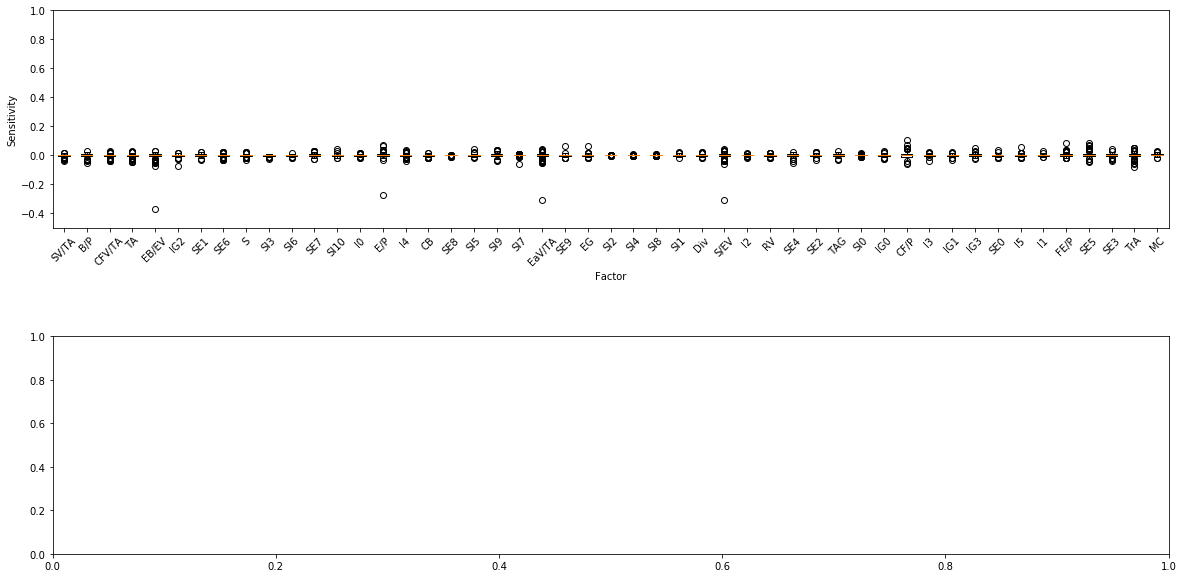

In [77]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.7)
#%sc=10000
idx=np.argsort(np.mean(mu[:,0:n_var_max], axis=0))
axes[0].boxplot(mu[:, idx])       # make your boxplot
axes[0].set_xticklabels(np.array(names)[idx],rotation=45) #['EV', 'P/B', 'EV/T12M EBITDA', 'P/S' , 'P/E','Log CAP'],rotation=45) 
axes[0].set_ylim([-.5,1])
axes[0].set_ylabel('Sensitivity')
axes[0].set_xlabel('Factor')
name_fig = "../figure/sensitivity/sensitivity_boxplot.png"
plt.savefig(name_fig)
#idx=np.argsort(np.mean(mu_ols[:,0:n_var], axis=0))
#axes[1].boxplot(mu_ols[:,idx]) 
#axes[1].set_ylim([-.5,1])
#axes[1].set_xticklabels(np.array(names)[idx],rotation=45) #['EV', 'P/B', 'EV/T12M EBITDA', 'P/S' , 'P/E','Log CAP'],rotation=45) 

#axes[1].set_ylabel('Sensitivity')
#axes[1].set_xlabel('Factor')
#plt.show()

In [60]:
Y_to_plot = pd.read_csv('../../data/Y_untouched.csv')
Y_to_plot.dropna(inplace=True)
dates_df = Y_to_plot.drop_duplicates('date')
dates_to_plot = dates_df['date'].str[:7]
dates_to_plot = np.array(dates_to_plot[0:training_periods]) 

In [64]:
factors = ['B/P', 'CF/P', 'E/P', 'S/EV', 'EB/EV', 'FE/P', 'TAG', 'MC', 'S',
       'TA', 'TrA', 'EaV/TA', 'CFV/TA', 'SV/TA', 'RV', 'CB', 'DIV', 'EG',
       'I0', 'I1', 'I2', 'I3', 'I4', 'I5', 'SI0', 'SI1', 'SI2', 'SI3',
       'SI4', 'SI5', 'SI6', 'SI7', 'SI8', 'SI9', 'SI10', 'S0', 'S1',
       'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'IG0',
       'IG1', 'IG2', 'IG3']

In [167]:
sensitivities_month = np.zeros((49, len(betas['PLS_NN'][50])))
for i in range(len(betas['PLS_NN'][50])):
    sensitivities_month[:,i] = np.mean(betas['PLS_NN'][50][i], axis=0)

In [169]:
sentivities_month_to_plot = pd.DataFrame(sensitivities_month, index=factors, columns=dates_to_plot)

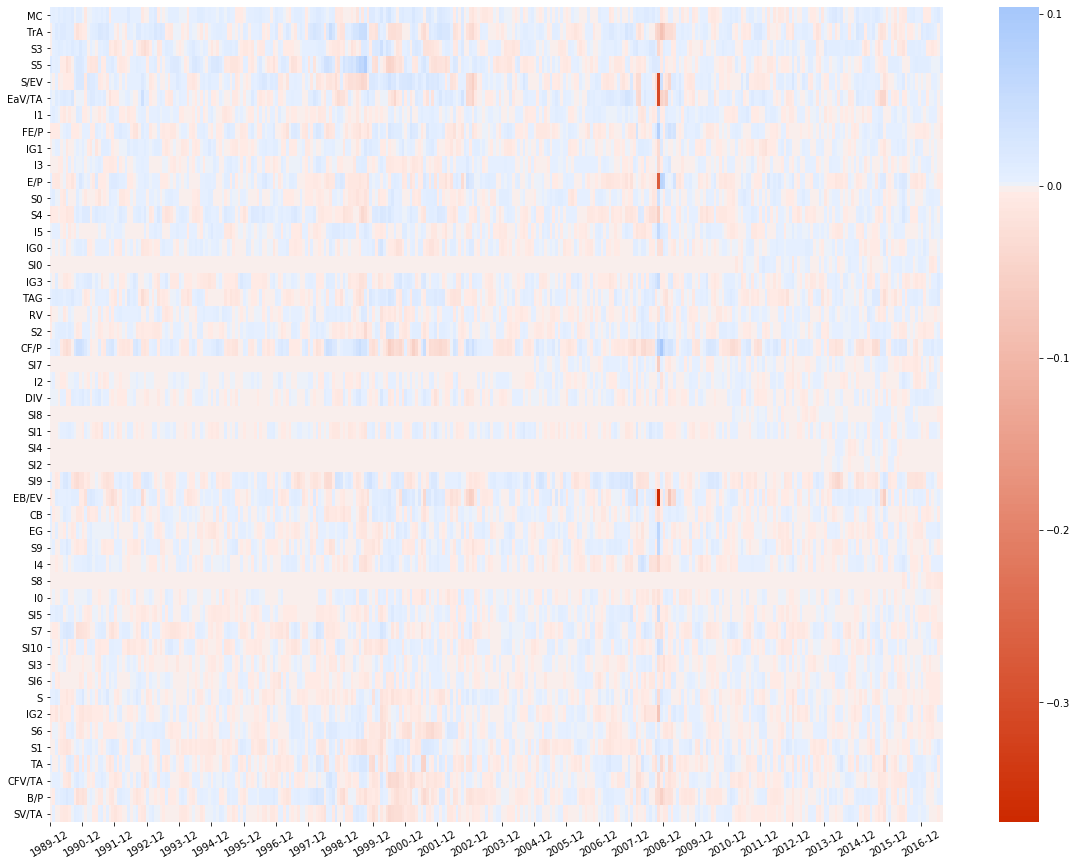

In [170]:
import seaborn as sns

plt.figure(figsize=(20,15))
indx_sorted = np.mean(sentivities_month_to_plot, axis=1).sort_values(ascending=False).index
cmap = sns.diverging_palette(15, 260, as_cmap=True, sep=1, s=100, l=45)
sns.heatmap(sentivities_month_to_plot.reindex(index = indx_sorted), cmap = cmap, linewidths=0, center=0)
plt.xticks(np.arange(0,len(dates_to_plot)+1,12), labels = dates_to_plot[np.arange(0,len(dates_to_plot)+1,12)])
plt.tick_params(axis='y',rotation=0)
plt.tick_params(axis='x',rotation=30)
name_fig = "../figure/sensitivity/heatmap_with_outlier.png"
plt.savefig(name_fig)

In [194]:
sentivities_month_to_plot_inliers = sentivities_month_to_plot.copy()
sentivities_month_to_plot_inliers["2008-10"] = np.nan
print(dates_to_plot[226])

2008-10


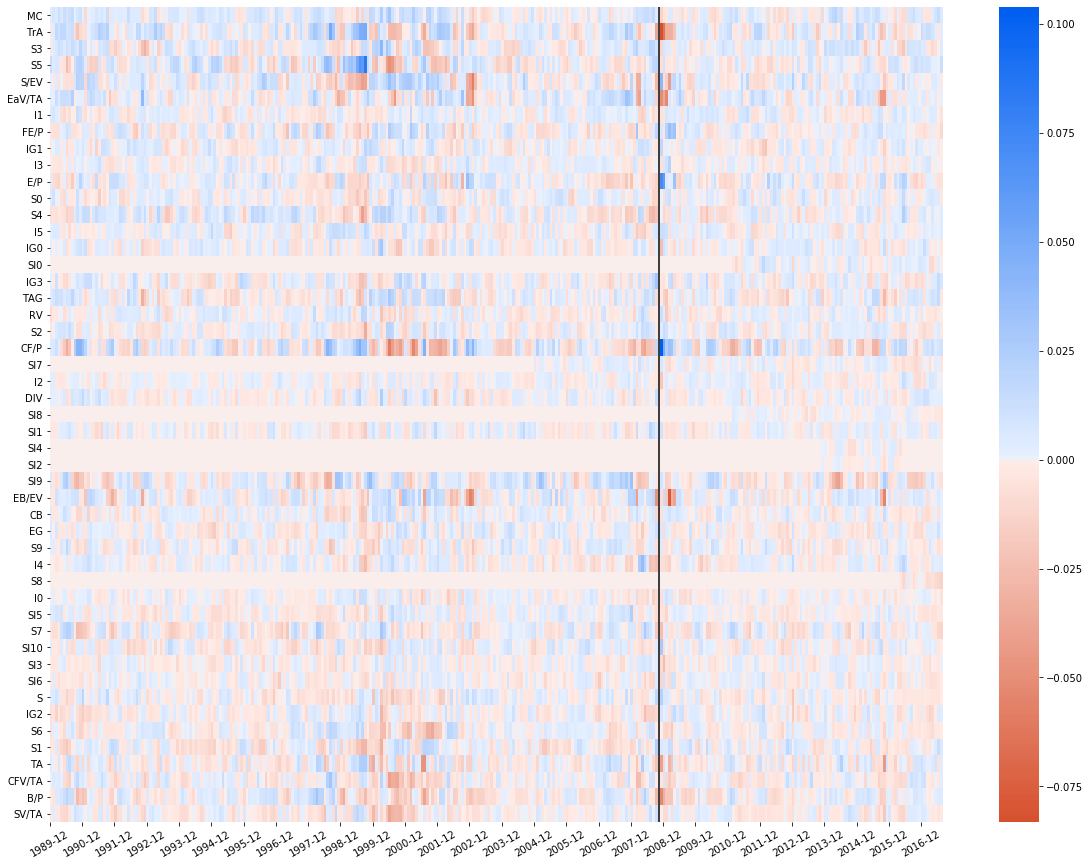

In [201]:
plt.figure(figsize=(20,15))
indx_sorted = np.mean(sentivities_month_to_plot_inliers, axis=1).sort_values(ascending=False).index
cmap = sns.diverging_palette(15, 260, as_cmap=True, sep=1, s=100, l=45)
sns.heatmap(sentivities_month_to_plot_inliers.reindex(index = indx_sorted), cmap = cmap, linewidths=0, center=0)
plt.xticks(np.arange(0,len(dates_to_plot)+1,12), labels = dates_to_plot[np.arange(0,len(dates_to_plot)+1,12)])
plt.tick_params(axis='y',rotation=0)
plt.tick_params(axis='x',rotation=30)
plt.vlines(x=226.5, ymin=-100, ymax=100)
name_fig = "../figure/sensitivity/heatmap_inlier.png"
plt.savefig(name_fig)

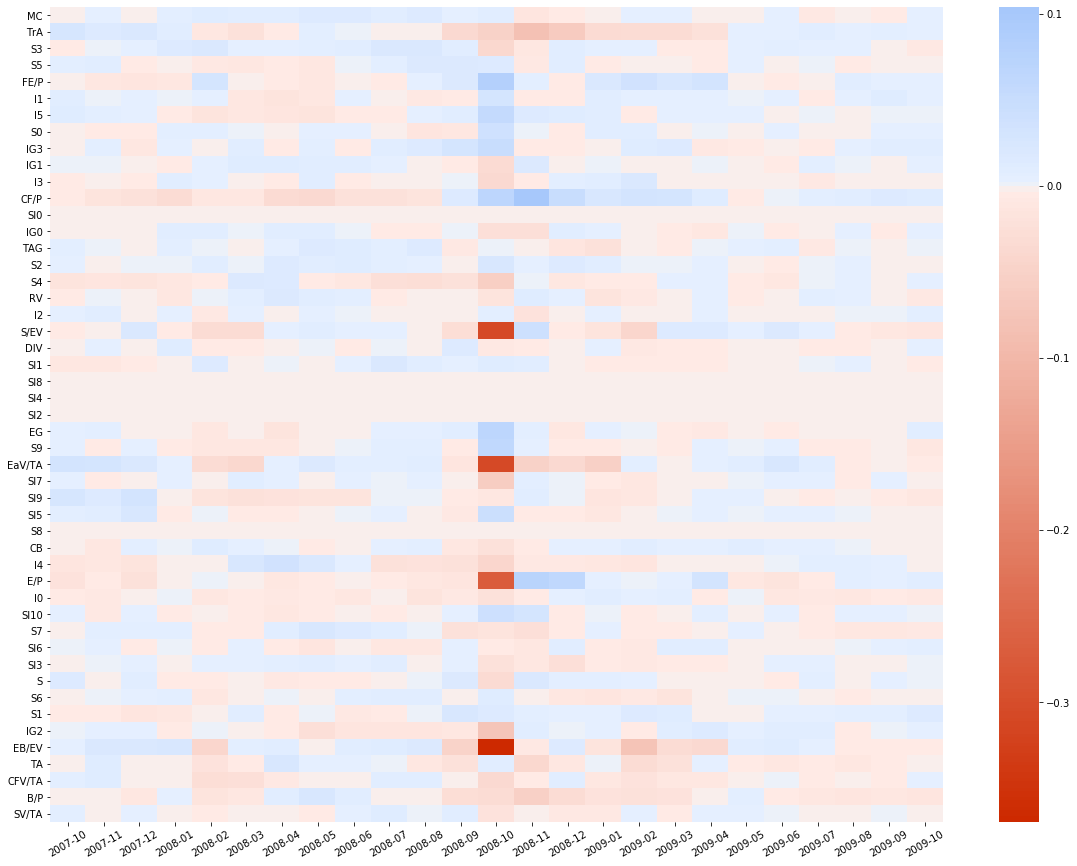

In [205]:
#outlier plot
plt.figure(figsize=(20,15))
indx_sorted = np.mean(sentivities_month_to_plot, axis=1).sort_values(ascending=False).index
cmap = sns.diverging_palette(15, 260, as_cmap=True, sep=1, s=100, l=45)
sns.heatmap(sentivities_month_to_plot.reindex(index = indx_sorted).loc[:, "2007-10":"2009-10"], cmap = cmap, linewidths=0, center=0)
plt.tick_params(axis='y',rotation=0)
plt.tick_params(axis='x',rotation=30)
name_fig = "../figure/sensitivity/heatmap_outlier.png"
plt.savefig(name_fig)